<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1Bb44nmvjN7fZwrRYMOA7fOSvfCTZaNI0" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.3 MB/s eta 0:00:00
time: 219 µs (started: 2023-09-17 12:17:29 +00:00)


# **Clasificación binaria**

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Cargar el conjunto de datos
data = load_breast_cancer()
X, y = data.data, data.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


time: 1.5 s (started: 2023-09-17 12:17:32 +00:00)


## Regresión logística

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=10) #probar con 10000

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva


time: 208 ms (started: 2023-09-16 11:25:06 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Evaluar el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_proba)}')

# Obtener y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcula la matriz de confusión
tn, fp, fn, tp = conf_matrix.ravel()

# Especificidad
specificity = tn / (tn + fp)
print(f'Specificity: {specificity}')

# Tasa de Falsos Positivos (FPR)
fpr = 1 - specificity
print(f'False Positive Rate: {fpr}')

# Valor Predictivo Negativo (NPV)
npv = tn / (tn + fn)
print(f'Negative Predictive Value: {npv}')

# Tasa de Falsos Negativos (FNR)
fnr = fn / (tp + fn)
print(f'False Negative Rate: {fnr}')

# Tasa de aciertos negativos (Negative Accuracy)
negative_accuracy = tn / (tn + fp)
print(f'Negative Accuracy: {negative_accuracy}')

# F1 Score para la clase negativa (se calcula de manera similar al F1 Score para la clase positiva)
f1_negative = 2 * (specificity * npv) / (specificity + npv)
print(f'F1 Score for Negative Class: {f1_negative}')


Accuracy: 0.9385964912280702
Precision: 0.9324324324324325
Recall: 0.971830985915493
F1 Score: 0.9517241379310345
ROC AUC: 0.9859154929577465
Specificity: 0.8837209302325582
False Positive Rate: 0.11627906976744184
Negative Predictive Value: 0.95
False Negative Rate: 0.028169014084507043
Negative Accuracy: 0.8837209302325582
F1 Score for Negative Class: 0.9156626506024096
time: 44.9 ms (started: 2023-09-16 11:25:13 +00:00)


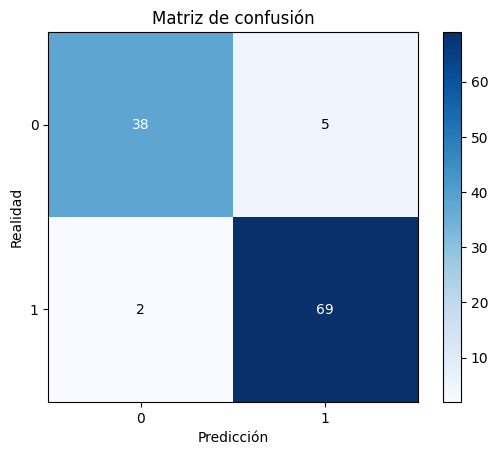

time: 851 ms (started: 2023-09-16 11:25:17 +00:00)


In [ ]:
# Gráfico de la matriz de confusión
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(conf_matrix.shape[1]),
       yticks=np.arange(conf_matrix.shape[0]),
       xticklabels=['0', '1'], yticklabels=['0', '1'],
       title='Matriz de confusión',
       ylabel='Realidad',
       xlabel='Predicción')

# Loop over data dimensions and create text annotations.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, format(conf_matrix[i, j], 'd'),
                ha="center", va="center",
                color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()


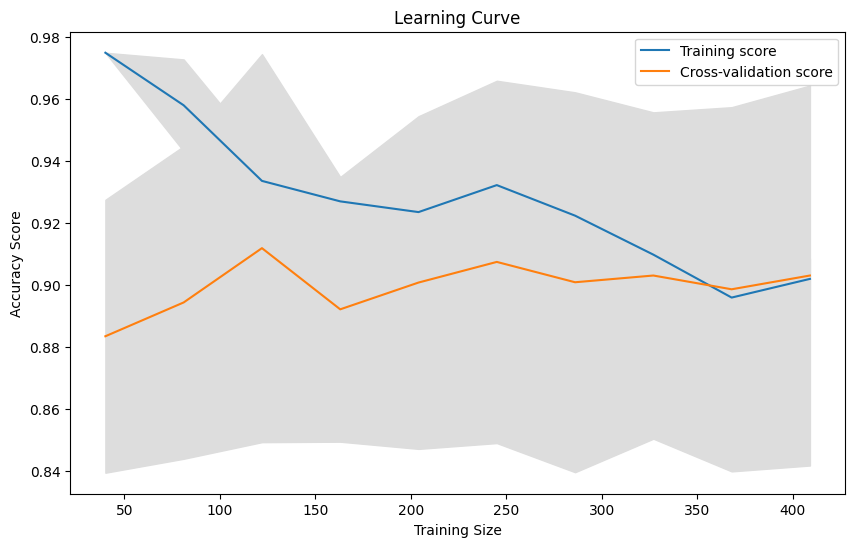

time: 2.73 s (started: 2023-09-16 11:25:23 +00:00)


In [ ]:
# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular las medias y las desviaciones estándar del rendimiento del entrenamiento y del conjunto de prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Dibujar las curvas
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

# Títulos y etiquetas
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')

# Mostrar la gráfica
plt.show()

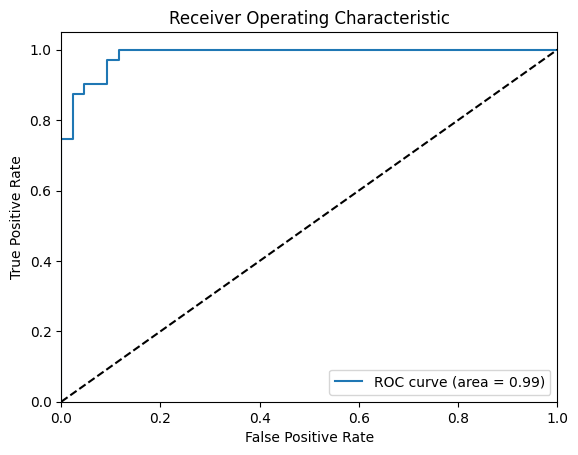

time: 830 ms (started: 2023-09-16 11:25:30 +00:00)


In [ ]:
# Graficar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Arboles de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Crear y entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva


time: 173 ms (started: 2023-09-16 11:25:39 +00:00)


In [ ]:
# Evaluar el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_proba)}')

# Obtener y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcula la matriz de confusión
tn, fp, fn, tp = conf_matrix.ravel()

# Especificidad
specificity = tn / (tn + fp)
print(f'Specificity: {specificity}')

# Tasa de Falsos Positivos (FPR)
fpr = 1 - specificity
print(f'False Positive Rate: {fpr}')

# Valor Predictivo Negativo (NPV)
npv = tn / (tn + fn)
print(f'Negative Predictive Value: {npv}')

# Tasa de Falsos Negativos (FNR)
fnr = fn / (tp + fn)
print(f'False Negative Rate: {fnr}')

# Tasa de aciertos negativos (Negative Accuracy)
negative_accuracy = tn / (tn + fp)
print(f'Negative Accuracy: {negative_accuracy}')

# F1 Score para la clase negativa (se calcula de manera similar al F1 Score para la clase positiva)
f1_negative = 2 * (specificity * npv) / (specificity + npv)
print(f'F1 Score for Negative Class: {f1_negative}')


Accuracy: 0.9473684210526315
Precision: 0.9577464788732394
Recall: 0.9577464788732394
F1 Score: 0.9577464788732394
ROC AUC: 0.9439895185063871
Specificity: 0.9302325581395349
False Positive Rate: 0.06976744186046513
Negative Predictive Value: 0.9302325581395349
False Negative Rate: 0.04225352112676056
Negative Accuracy: 0.9302325581395349
F1 Score for Negative Class: 0.9302325581395349
time: 20.8 ms (started: 2023-09-16 11:25:43 +00:00)


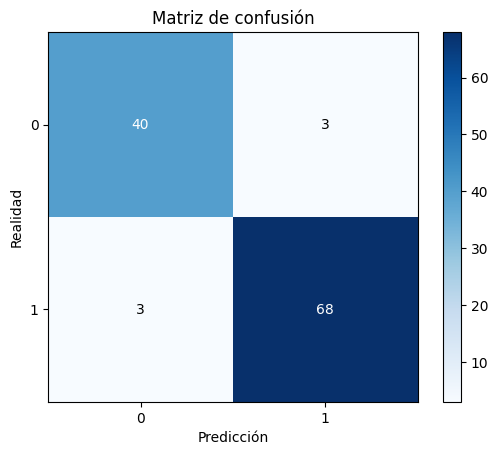

time: 253 ms (started: 2023-09-16 11:25:48 +00:00)


In [ ]:
# Gráfico de la matriz de confusión
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(conf_matrix.shape[1]),
       yticks=np.arange(conf_matrix.shape[0]),
       xticklabels=['0', '1'], yticklabels=['0', '1'],
       title='Matriz de confusión',
       ylabel='Realidad',
       xlabel='Predicción')

# Loop over data dimensions and create text annotations.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, format(conf_matrix[i, j], 'd'),
                ha="center", va="center",
                color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()

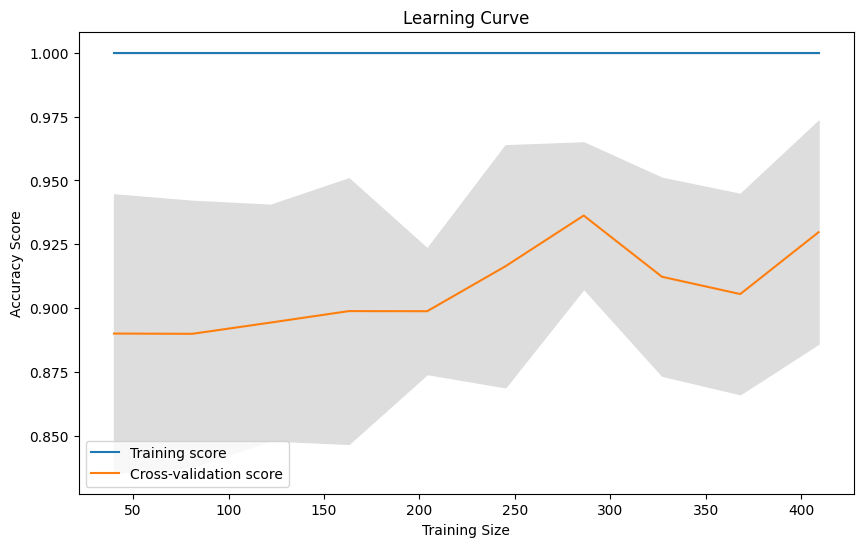

time: 842 ms (started: 2023-09-16 11:25:51 +00:00)


In [ ]:
# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular las medias y las desviaciones estándar del rendimiento del entrenamiento y del conjunto de prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Dibujar las curvas
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

# Títulos y etiquetas
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')

# Mostrar la gráfica
plt.show()


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo de Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva


time: 291 ms (started: 2023-09-16 11:25:57 +00:00)


In [ ]:
# Evaluar el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_proba)}')

# Obtener y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcula la matriz de confusión
tn, fp, fn, tp = conf_matrix.ravel()

# Especificidad
specificity = tn / (tn + fp)
print(f'Specificity: {specificity}')

# Tasa de Falsos Positivos (FPR)
fpr = 1 - specificity
print(f'False Positive Rate: {fpr}')

# Valor Predictivo Negativo (NPV)
npv = tn / (tn + fn)
print(f'Negative Predictive Value: {npv}')

# Tasa de Falsos Negativos (FNR)
fnr = fn / (tp + fn)
print(f'False Negative Rate: {fnr}')

# Tasa de aciertos negativos (Negative Accuracy)
negative_accuracy = tn / (tn + fp)
print(f'Negative Accuracy: {negative_accuracy}')

# F1 Score para la clase negativa (se calcula de manera similar al F1 Score para la clase positiva)
f1_negative = 2 * (specificity * npv) / (specificity + npv)
print(f'F1 Score for Negative Class: {f1_negative}')


Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222
ROC AUC: 0.9952505732066819
Specificity: 0.9302325581395349
False Positive Rate: 0.06976744186046513
Negative Predictive Value: 0.975609756097561
False Negative Rate: 0.014084507042253521
Negative Accuracy: 0.9302325581395349
F1 Score for Negative Class: 0.9523809523809524
time: 21.1 ms (started: 2023-09-16 11:26:01 +00:00)


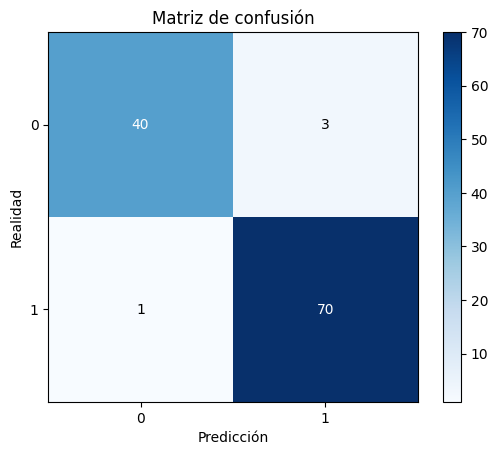

time: 234 ms (started: 2023-09-16 11:26:04 +00:00)


In [ ]:
# Gráfico de la matriz de confusión
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(conf_matrix.shape[1]),
       yticks=np.arange(conf_matrix.shape[0]),
       xticklabels=['0', '1'], yticklabels=['0', '1'],
       title='Matriz de confusión',
       ylabel='Realidad',
       xlabel='Predicción')

# Loop over data dimensions and create text annotations.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, format(conf_matrix[i, j], 'd'),
                ha="center", va="center",
                color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()

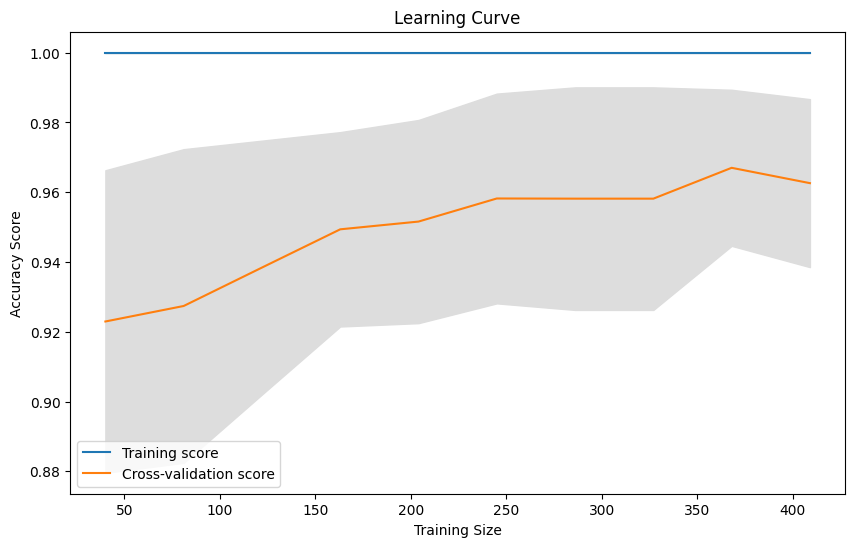

time: 18.5 s (started: 2023-09-16 11:26:05 +00:00)


In [ ]:
# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular las medias y las desviaciones estándar del rendimiento del entrenamiento y del conjunto de prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Dibujar las curvas
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

# Títulos y etiquetas
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')

# Mostrar la gráfica
plt.show()


## XGBOOST

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Definir el modelo XGBoost
clf = XGBClassifier()

# Definir los hiperparámetros y sus posibles valores
param_grid = {
    'n_estimators': [50, 75, 100, 125, 150, 175, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': [2, 3, 4, 5, 6],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# Configurar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy')

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Mostrar la mejor puntuación (exactitud) alcanzada con los mejores hiperparámetros
print(f"Mejor puntuación: {grid_search.best_score_}")


Mejores hiperparámetros: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 175, 'subsample': 0.6}
Mejor puntuación: 0.986784013012664
time: 1h 58min 47s (started: 2023-09-16 11:26:30 +00:00)


In [ ]:
# Recuperar el mejor modelo XGBoost
clf = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva


time: 4.29 ms (started: 2023-09-16 13:25:18 +00:00)


In [ ]:
# Evaluar el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_proba)}')

# Obtener y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcula la matriz de confusión
tn, fp, fn, tp = conf_matrix.ravel()

# Especificidad
specificity = tn / (tn + fp)
print(f'Specificity: {specificity}')

# Tasa de Falsos Positivos (FPR)
fpr = 1 - specificity
print(f'False Positive Rate: {fpr}')

# Valor Predictivo Negativo (NPV)
npv = tn / (tn + fn)
print(f'Negative Predictive Value: {npv}')

# Tasa de Falsos Negativos (FNR)
fnr = fn / (tp + fn)
print(f'False Negative Rate: {fnr}')

# Tasa de aciertos negativos (Negative Accuracy)
negative_accuracy = tn / (tn + fp)
print(f'Negative Accuracy: {negative_accuracy}')

# F1 Score para la clase negativa (se calcula de manera similar al F1 Score para la clase positiva)
f1_negative = 2 * (specificity * npv) / (specificity + npv)
print(f'F1 Score for Negative Class: {f1_negative}')


Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222
ROC AUC: 0.9908286930887651
Specificity: 0.9302325581395349
False Positive Rate: 0.06976744186046513
Negative Predictive Value: 0.975609756097561
False Negative Rate: 0.014084507042253521
Negative Accuracy: 0.9302325581395349
F1 Score for Negative Class: 0.9523809523809524
time: 15.4 ms (started: 2023-09-16 13:25:18 +00:00)


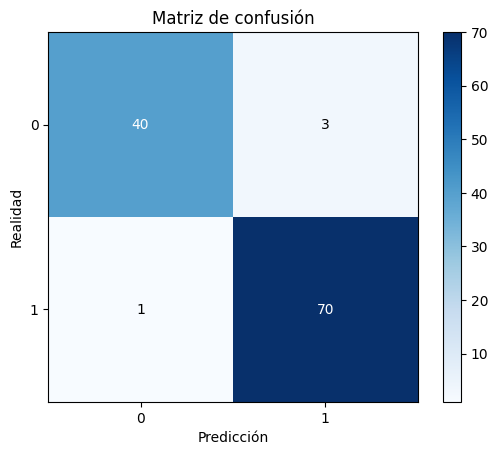

time: 221 ms (started: 2023-09-16 13:25:18 +00:00)


In [ ]:
# Gráfico de la matriz de confusión
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(conf_matrix.shape[1]),
       yticks=np.arange(conf_matrix.shape[0]),
       xticklabels=['0', '1'], yticklabels=['0', '1'],
       title='Matriz de confusión',
       ylabel='Realidad',
       xlabel='Predicción')

# Loop over data dimensions and create text annotations.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, format(conf_matrix[i, j], 'd'),
                ha="center", va="center",
                color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()

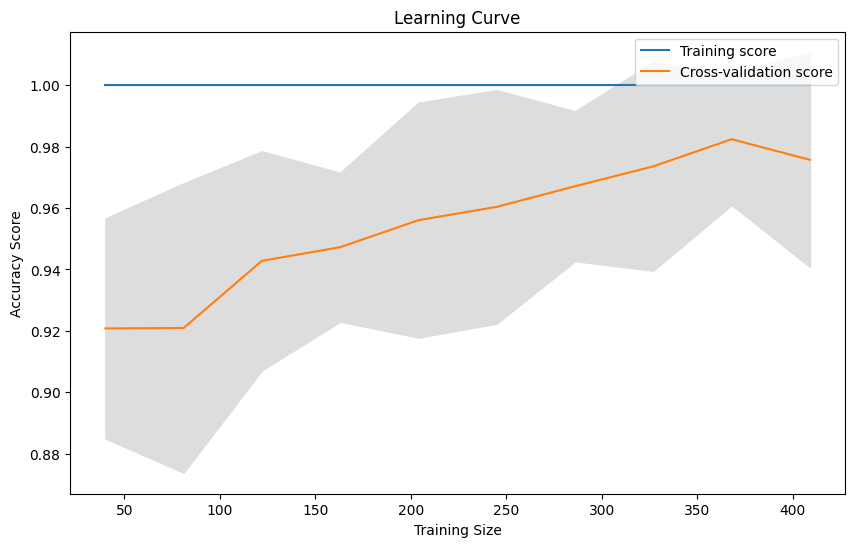

time: 6.44 s (started: 2023-09-16 13:25:18 +00:00)


In [ ]:
# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular las medias y las desviaciones estándar del rendimiento del entrenamiento y del conjunto de prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Dibujar las curvas
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

# Títulos y etiquetas
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')

# Mostrar la gráfica
plt.show()
